<a href="https://colab.research.google.com/github/MARTIN0399/hacking-civico/blob/master/proyecto/proyecto_hacking_civico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Emergencias ambientales en 2020 en México y el Presupuesto destinado en 2020 a la Inspección y Vigilancia al Medio Ambiente y sus Recursos__

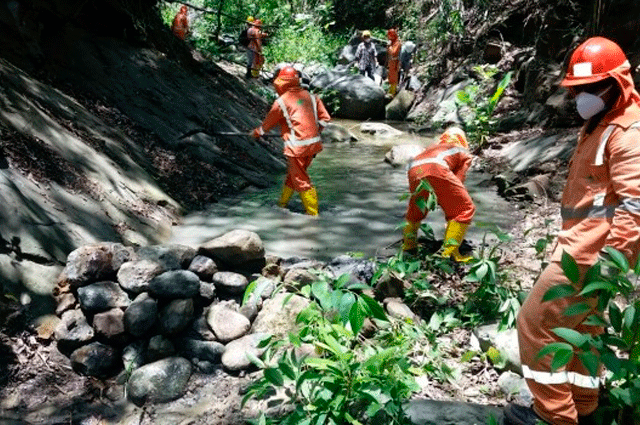

El siguiente proyecto analiza las __emergencias ambientales asociadas a sustancias químicas__ en todas y cada una de las Entidades Federativas de nuestro país, y de igual forma el monto aprobado a _Procuraduría Federal de Protección al Ambiente_ en el _Presupuesto de Egresos de la Federación de 2020_ para la __inspección y vigilancia del medio ambiente y los recursos naturales__ destinado a las diversas delegaciones de la _Procuraduría Federal de Protección del Medio Ambiente_ presentes en cada uno de los Estados de la República Mexicana.

### __1) Importación de librerías y carga de datos__

In [1]:
# Importación de Librerías 

import io
import statistics
import pandas as pd
import numpy as np

In [2]:
# Montando datos

from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Montando datos del monto aporbado a Entidad Federativa de acuerdo con el Porgrama Inspección y Vigilancia del Medio Ambeinte y recursos naturales  

path = '/content/drive/My Drive/Hacking Cívico/Proyecto/Montos.csv'
data_monto = pd.read_csv(path, encoding='Latin-1')

In [4]:
data_monto.head()

,Estado,Monto
0,Aguascalientes,995601
1,Baja California,4282141
2,Baja California Sur,2540108
3,Campeche,1767456
4,Chiapas,2157137


In [5]:
# Montando datos de emergencias ambientales asociadas a sustancias químicas
path = '/content/drive/My Drive/Hacking Cívico/Proyecto/emergencias_ambientales.csv'
data_emergencias = pd.read_csv(path, encoding='Latin-1')

In [ ]:
data_emergencias.head()

,ESTADO,DERRAME,EXPLOSION,FUGA,INCENDIO,OTRO
0,AGUASCALIENTES,16,2,3,6,0
1,BAJA CALIFORNIA,112,15,28,33,3
2,BAJA CALIFORNIA SUR,13,1,1,2,0
3,CAMPECHE,20,1,6,6,0
4,CHIAPAS,36,56,134,56,5


###  __2)Perfilamiento y limpieza de datos__

In [6]:
# Dimensión de los datos del Monto aprobado 
print('Número de filas: {}'.format(data_monto.shape[0]))
print('Número de columnas: {}'.format(data_monto.shape[1]))

Número de filas: 32
Número de columnas: 2


In [7]:
# Dimensión de los datos de emergencias ambientales
print('Número de filas: {}'.format(data_emergencias.shape[0]))
print('Número de columnas: {}'.format(data_emergencias.shape[1]))

Número de filas: 32
Número de columnas: 6


In [8]:
# Columnas (variables)
data_monto.columns

Index(['Estado', ' Monto '], dtype='object')

In [9]:
# limpieza del nombre de las columnas, remover espacios, carácteres especiales y pasar a minúsculas
data_monto.columns = data_monto.columns.str.replace(' ', '_')
data_monto.columns = data_monto.columns.str.replace('.', '')
data_monto.columns = data_monto.columns.str.lower()

In [10]:
# Columnas (variables)
data_emergencias.columns

Index(['ESTADO', 'DERRAME', 'EXPLOSION', 'FUGA', 'INCENDIO', 'OTRO'], dtype='object')

In [11]:
# limpieza del nombre de las columnas, remover espacios, carácteres especiales y pasar a minúsculas
data_emergencias.columns = data_emergencias.columns.str.replace(' ', '_')
data_emergencias.columns = data_emergencias.columns.str.replace('.', '')
data_emergencias.columns = data_emergencias.columns.str.lower()

In [12]:
# calcular número de valores nulos por columna
for col in data_monto.columns:
  print('Valores nulos en "{}": {}'.format(col,data_monto[col].isna().sum()))

Valores nulos en "estado": 0
Valores nulos en "_monto_": 0


In [13]:
# calcular número de valores nulos por columna
for col in data_emergencias.columns:
  print('Valores nulos en "{}": {}'.format(col,data_emergencias[col].isna().sum()))

Valores nulos en "estado": 0
Valores nulos en "derrame": 0
Valores nulos en "explosion": 0
Valores nulos en "fuga": 0
Valores nulos en "incendio": 0
Valores nulos en "otro": 0


In [14]:
# tipos de datos 
data_monto.dtypes

estado     object
_monto_     int64
dtype: object

In [15]:
# tipos de datos
data_emergencias.dtypes

estado       object
derrame       int64
explosion     int64
fuga          int64
incendio      int64
otro          int64
dtype: object

###  __3) Filtros__

In [16]:
# ¿Cuál es el número de derrames por cada estado?
data_emergencias.groupby('estado').derrame.mean()

estado
AGUASCALIENTES           16
BAJA CALIFORNIA         112
BAJA CALIFORNIA SUR      13
CAMPECHE                 20
CHIAPAS                  36
CHIHUAHUA                28
CIUDAD DE MEXICO         16
COAHUILA                 20
COLIMA                   99
DURANGO                  26
GUANAJUATO             1645
GUERRERO                 18
HIDALGO                 253
JALISCO                 167
MEXICO                  284
MICHOACAN               104
MORELOS                  42
NAYARIT                  18
NUEVO LEON              107
OAXACA                  137
PUEBLA                  835
QUERETARO               107
QUINTANA ROO             12
SAN LUIS POTOSI          45
SINALOA                 113
SONORA                  118
TABASCO                 337
TAMAULIPAS              284
TLAXCALA                 89
VERACRUZ                487
YUCATAN                  25
ZACATECAS                52
Name: derrame, dtype: int64

In [17]:
# ¿Cuál es el número de explosiones por cada estado?
data_emergencias.groupby('estado').explosion.mean()

estado
AGUASCALIENTES           2
BAJA CALIFORNIA         15
BAJA CALIFORNIA SUR      1
CAMPECHE                 1
CHIAPAS                 56
CHIHUAHUA               20
CIUDAD DE MEXICO         2
COAHUILA                 6
COLIMA                  22
DURANGO                  7
GUANAJUATO              38
GUERRERO                 6
HIDALGO                 16
JALISCO                 34
MEXICO                 111
MICHOACAN               28
MORELOS                 11
NAYARIT                  3
NUEVO LEON              16
OAXACA                  29
PUEBLA                  30
QUERETARO               15
QUINTANA ROO             1
SAN LUIS POTOSI          8
SINALOA                  6
SONORA                  28
TABASCO                 17
TAMAULIPAS              21
TLAXCALA                15
VERACRUZ                30
YUCATAN                  4
ZACATECAS                3
Name: explosion, dtype: int64

In [18]:
# ¿Cuál es el número de fugas por cada estado?
data_emergencias.groupby('estado').fuga.mean()

estado
AGUASCALIENTES           3
BAJA CALIFORNIA         28
BAJA CALIFORNIA SUR      1
CAMPECHE                 6
CHIAPAS                134
CHIHUAHUA               27
CIUDAD DE MEXICO         2
COAHUILA                 4
COLIMA                  37
DURANGO                  6
GUANAJUATO              58
GUERRERO                 5
HIDALGO                 17
JALISCO                 36
MEXICO                  68
MICHOACAN               10
MORELOS                  9
NAYARIT                  5
NUEVO LEON              27
OAXACA                  28
PUEBLA                  45
QUERETARO               45
QUINTANA ROO             0
SAN LUIS POTOSI          8
SINALOA                 30
SONORA                  68
TABASCO                 29
TAMAULIPAS              40
TLAXCALA                 7
VERACRUZ                46
YUCATAN                  6
ZACATECAS                3
Name: fuga, dtype: int64

In [19]:
# ¿Cuál es el número de incendios por cada estado?
data_emergencias.groupby('estado').incendio.mean()

estado
AGUASCALIENTES          6
BAJA CALIFORNIA        33
BAJA CALIFORNIA SUR     2
CAMPECHE                6
CHIAPAS                56
CHIHUAHUA              19
CIUDAD DE MEXICO        5
COAHUILA                4
COLIMA                 21
DURANGO                11
GUANAJUATO             65
GUERRERO                7
HIDALGO                32
JALISCO                51
MEXICO                 64
MICHOACAN              17
MORELOS                12
NAYARIT                 3
NUEVO LEON             42
OAXACA                  7
PUEBLA                 41
QUERETARO              33
QUINTANA ROO            1
SAN LUIS POTOSI         8
SINALOA                18
SONORA                 17
TABASCO                16
TAMAULIPAS             36
TLAXCALA               10
VERACRUZ               50
YUCATAN                 6
ZACATECAS               4
Name: incendio, dtype: int64

In [21]:
# ¿Cuál es el número de otras emergencias ambientales por cada estado?
data_emergencias.groupby('estado').otro.mean()

estado
AGUASCALIENTES         0
BAJA CALIFORNIA        3
BAJA CALIFORNIA SUR    0
CAMPECHE               0
CHIAPAS                5
CHIHUAHUA              0
CIUDAD DE MEXICO       0
COAHUILA               0
COLIMA                 0
DURANGO                0
GUANAJUATO             3
GUERRERO               1
HIDALGO                0
JALISCO                2
MEXICO                 0
MICHOACAN              2
MORELOS                1
NAYARIT                0
NUEVO LEON             0
OAXACA                 1
PUEBLA                 0
QUERETARO              2
QUINTANA ROO           0
SAN LUIS POTOSI        1
SINALOA                7
SONORA                 7
TABASCO                1
TAMAULIPAS             3
TLAXCALA               0
VERACRUZ               3
YUCATAN                1
ZACATECAS              0
Name: otro, dtype: int64

In [22]:
# Filtrar por tipos generales (categóricas y numéricas)
numerical = data_emergencias.select_dtypes(include='number')
categorical = data_emergencias.select_dtypes(include=['object', 'bool', 'category', 'datetime64[ns]'])

In [23]:
numerical.head()

,derrame,explosion,fuga,incendio,otro
0,16,2,3,6,0
1,112,15,28,33,3
2,13,1,1,2,0
3,20,1,6,6,0
4,36,56,134,56,5


In [24]:
categorical.head()

,estado
0,AGUASCALIENTES
1,BAJA CALIFORNIA
2,BAJA CALIFORNIA SUR
3,CAMPECHE
4,CHIAPAS


In [25]:
# Cardinalidad Valores únicos por columna
for col in numerical.columns:
  print('Valores únicos en "{}": {}'.format(col,numerical [col].nunique()))

Valores únicos en "derrame": 27
Valores únicos en "explosion": 21
Valores únicos en "fuga": 24
Valores únicos en "incendio": 26
Valores únicos en "otro": 6


In [26]:
# unicidad - proporción de valores únicos por columna
total = data_emergencias.shape[0]
for col in numerical.columns:
  print('Porcentaje de valores únicos en "{}": {}%'.format(col,round(numerical[col].nunique()/total*100,2)))

Porcentaje de valores únicos en "derrame": 84.38%
Porcentaje de valores únicos en "explosion": 65.62%
Porcentaje de valores únicos en "fuga": 75.0%
Porcentaje de valores únicos en "incendio": 81.25%
Porcentaje de valores únicos en "otro": 18.75%


In [27]:
numerical.describe()

,derrame,explosion,fuga,incendio,otro
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,177.031250,18.812500,26.187500,21.968750,1.343750
std,317.546287,21.348774,28.170492,19.446344,1.961063
min,12.000000,1.000000,0.000000,1.000000,0.000000
25%,23.750000,5.500000,5.750000,6.000000,0.000000
50%,94.000000,15.000000,22.000000,16.500000,0.500000
75%,144.500000,28.000000,37.750000,33.750000,2.000000
max,1645.000000,111.000000,134.000000,65.000000,7.000000


In [28]:
# Filtrar por tipos generales (categóricas y numéricas)
numerical = data_monto.select_dtypes(include='number')
categorical = data_monto.select_dtypes(include=['object', 'bool', 'category', 'datetime64[ns]'])

In [29]:
numerical.head()

,_monto_
0,995601
1,4282141
2,2540108
3,1767456
4,2157137


In [31]:
categorical.head()

,estado
0,Aguascalientes
1,Baja California
2,Baja California Sur
3,Campeche
4,Chiapas


In [32]:
# Cardinalidad Valores únicos por columna en set de montos
for col in categorical.columns:
  print('Valores únicos en "{}": {}'.format(col,categorical [col].nunique()))

Valores únicos en "estado": 32


In [33]:
# unicidad - proporción de valores únicos por columna en set de montos
total = data_monto.shape[0]
for col in categorical.columns:
  print('Porcentaje de valores únicos en "{}": {}%'.format(col,round(categorical[col].nunique()/total*100,2)))

Porcentaje de valores únicos en "estado": 100.0%


In [34]:
numerical.describe()

,_monto_
count,3.200000e+01
mean,6.766071e+06
std,2.582527e+07
min,3.379810e+05
25%,1.557410e+06
50%,2.217750e+06
75%,2.657328e+06
max,1.481895e+08


### __4)Análisis de datos__

In [38]:
# ¿Cuántas emergencias ambientales ocurren en el estado de Guanajuato?
data_emergencias.query('estado == "GUANAJUATO" ')

,estado,derrame,explosion,fuga,incendio,otro
10,GUANAJUATO,1645,38,58,65,3


In [39]:
# ¿Cuánto monto se destino a Guanajuato en 2020 para la inspección y vigilancia del medio ambiente y recursos naturales?
data_monto.query('estado == "Guanajuato" ')

,estado,_monto_
11,Guanajuato,1806380


In [37]:
#¿En que entidades no hay otro tipo de emergencias ambientales?
data_emergencias[data_emergencias.otro == 0].estado.value_counts()

CAMPECHE               1
PUEBLA                 1
BAJA CALIFORNIA SUR    1
COAHUILA               1
DURANGO                1
CHIHUAHUA              1
TLAXCALA               1
COLIMA                 1
NAYARIT                1
ZACATECAS              1
MEXICO                 1
CIUDAD DE MEXICO       1
HIDALGO                1
QUINTANA ROO           1
AGUASCALIENTES         1
NUEVO LEON             1
Name: estado, dtype: int64

In [61]:
#¿En que entidades no hay otro tipo de emergencias ambientales?
data_emergencias[data_emergencias.derrame == 12 & 13].estado.value_counts()

QUINTANA ROO    1
Name: estado, dtype: int64

In [62]:
#¿En que entidades no hay otro tipo de emergencias ambientales?
data_emergencias[data_emergencias.explosion == 1].estado.value_counts()

BAJA CALIFORNIA SUR    1
CAMPECHE               1
QUINTANA ROO           1
Name: estado, dtype: int64

In [63]:
#¿En que entidades no hay otro tipo de emergencias ambientales?
data_emergencias[data_emergencias.fuga == 0].estado.value_counts()

QUINTANA ROO    1
Name: estado, dtype: int64

In [65]:
#¿En que entidades no hay otro tipo de emergencias ambientales?
data_emergencias[data_emergencias.incendio == 1].estado.value_counts()

QUINTANA ROO    1
Name: estado, dtype: int64

### __5)Visualizaciones de datos__

In [54]:
import altair as alt
import seaborn as sns

In [55]:
grafico_monto = alt.Chart(data_monto).mark_line().encode(
    x = alt.X("estado:N", title = "Estados"), 
    y = alt.Y("mean(_monto_):Q", title = "Monto aprobado en Millones de Pesos") 
)

In [56]:
grafico_monto.properties(
    width = 600,
    height= 600,
    title = "Monto para cada Estado para la Inspección y Vigilancia del Medio Ambiente y sus Recursos"
)

alt.Chart(...)

In [57]:
gráfico_derrames = alt.Chart(data_emergencias).mark_bar().encode(
    x = alt.X("estado:N", title = "Estados" ),
    y = alt.Y("mean(derrame):Q", title = "Número de derrames" ) 
)

In [58]:
gráfico_derrames.properties(
    width = 700,
    height= 400,
    title = "Derrames asociados a sustancias químicas por cada Estado en 2020"
)

alt.Chart(...)

In [45]:
gráfico_explosiones = alt.Chart(data_emergencias).mark_bar().encode(
    x = alt.X( "estado:N", title = "Estados"),
    y = alt.Y("mean(explosion):Q", title = "Número de explosiones")
)

In [46]:
gráfico_explosiones.properties(
    width = 700,
    height= 400,
    title = "Explosiones asociadas a sustancias químicas por cada Estado en 2020"
)

alt.Chart(...)

In [47]:
gráfico_fugas = alt.Chart(data_emergencias).mark_bar().encode(
    x = alt.X( "estado:N", title = "Estados"),
    y = alt.Y("mean(fuga):Q", title = "Número de fugas")
)

In [48]:
gráfico_fugas.properties(
    width = 700,
    height= 400,
    title = "Fugas asociadas a sustancias químicas por cada Estado en 2020"
)

alt.Chart(...)

In [49]:
gráfico_incendios = alt.Chart(data_emergencias).mark_bar().encode(
    x = alt.X( "estado:N", title = "Estados"),
    y = alt.Y("mean(incendio):Q", title = "Número de incendios")
)

In [50]:
gráfico_incendios.properties(
    width = 700,
    height= 400,
    title = "Incendios asociados a sustancias químicas en cada Estado en 2020"
)

alt.Chart(...)

In [51]:
gráfico_otro = alt.Chart(data_emergencias).mark_bar().encode(
    x = alt.X( "estado:N", title = "Estados"),
    y = alt.Y("mean(otro):Q", title = "Número de otras emergencias ambientales"),
)

In [52]:
gráfico_otro.properties(
    width = 700,
    height= 400,
    title = "Otras emergencias ambientales asociadas a sustancias químicas en cada Estado en 2020"
)

alt.Chart(...)

In [53]:
gráfico_otro

alt.Chart(...)

### 6)Conclusiones

__Distribución de los recursos para la Inspección y Vigilancia del Medio Ambiente y sus Recursos de acuerdo con el PEF 2020__

En base a los datos anteriormente presentados se puede señalar que mayormente hay una __distribución homogénea__ a lo largo del país de los recursos orientados al programa presupuestario de __Inspección y Vigilancia del Medio Ambiente y sus Recursos__, a excepción de la __Ciudad de México__ seguramente esto se deberá a que la Unidad Responsable de la Ejeución de los recursos, es decir, la [PROFEPA](https://www.gob.mx/profepa/que-hacemos) es una entidad del _Gobierno Federal_ y cumplen con diversas labores administrativas en dicha demarcación territorial.

Sobre la distribución de los recursos destinas a la __Inspección y Vigilancia del Medio Ambientes y sus Recursos__ podemos identificar principalmente a las siguientes Entidades Federativas:
 
 |Estado| Monto aprobado ($)|
|-------|---------|
Ciudad de México |  148,189,513 |
Quintana Roo |  4,355,101 |
Baja California |  4,282,141 |



Podemos identificar que la Delegación de la PROFEPA en __Guanajuato__ recibió en __2020__ un total de __$1,806,380__, observando que ese monto se encuentra por __debajo del promedio nacional__, el cual se ve severamente condicionado por el alto monto que recibe la Ciudad de México, pero en comparación con las demás Entidades Federativas, Guanajuato se encuentra en el __primer cuartil__, lo cual indica que es uno de los Estados que menos monto recibe. 

__Emergencias ambientales ocurridas a lo largo del 2020 relacionadas a sustancias químicas__

1)Respecto a las emergencias ambientales asociadas a las sustancias químicas ocurridas en 2020 podemos identificar que sobre los _Derrames_: 

|Estado| Derrames|
|-------|---------|
Guanajuato | 1,645 |
Puebla   | 835 |
Vercruz | 487| 

El promedio nacional es de __177.031250__ derrames.

2)Sobre las _explosiones_ ocurridas en lo que va del 2020 destacan las siguientes Estados:

|Estado| Explosiones| 
|-------|------------|
Estado de México | 111 |
Chiapas | 56 |
Guanajuato | 38|  

Promedio nacional __18.812500__ explosiones.

3)De acuerdo con los datos en lo que va del 2020 sobre _fugas_ encontramos a las siguientes Entidades Federativas:

|Estado| Fugas| 
|-------|------------|
Chiapas | 134 |
Estado de México | 68 |
Guanajuato | 58 |

El promedio nacional oscila en __26.187500__ fugas.

4)Sobre los _Incendios_ asociados a sustancias químicas podemos identificar:

|Estado| Indencios| 
|-------|------------|
Guanajuato | 65 |
Estado de México | 64 |
Chiapas | 56 |

Siendo para esta emergencia el promedio nacional de __21.968750__ incendios.

5)Respecto a _otras emergencias_ ambientales asosicadas a sustancias químicas, destacan: 

|Estado| Otras emergencias| 
|-------|------------|
Sinaloa y San Luis Potosí | 7 |
Chiapas | 5 |
Baja California, Guanajuato, Tamaulipas y Veracuz | 3 |

Siendo el promedio nacional __1.343750__.

Finalmente, se puede señalar como preocupante la situación del Estado de __Guanajuato__ ya que en es la Entidad Federativa con más _emergencias ambientales asociadas a sustancias químicas_ con un total de __1,809__. Mientras que __Quintana Roo__ es el Esado con menor número de emergencias ambientales al contar únicamente con __14__ en lo que va del 2020. Una posible hipótesis es que _Quintana Roo_ es la _segunda Entidad que más monto recibe_ para la Inspección y Vigilancia del Medio Ambiente y sus Recursos, lo que siginificaría revisar los criterios para la distribución de los montos en los diversos Estados de la República. 
En este sentido, los dato revelan como principal área de oportunidad redoblar esfuerzos en el Estado de Guanajuato en materia de protección ambiental desde aspectos presupuestarios hasta la labor operativa que permita un correcto funcionamiento de la industria sin causar aleraciones o afectaciones al entorno natural y los recursos que este conforma.




__Fuentes__:

1) Base da datos de Datos Abiertos de México sobre [Emergenicas Ambientales asociadas a sustancias químicas](https://datos.gob.mx/busca/dataset/emergencias-ambientales-asociadas-a-sustancias-quimicas)

2) Base de datos de Transpatencia Presupuestaria sobre el [Presupuesto de Egresos de la Federación de 2020](https://www.transparenciapresupuestaria.gob.mx/es/PTP/Datos_Abiertos)